<a href="https://colab.research.google.com/github/subhashchandra630/Python-ca/blob/main/Student_Performance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url='https://raw.githubusercontent.com/subhashchandra630/Python-ca/main/StudentsPerformance.csv'
d=pd.read_csv(url)
d.head(5)



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
d.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
d.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

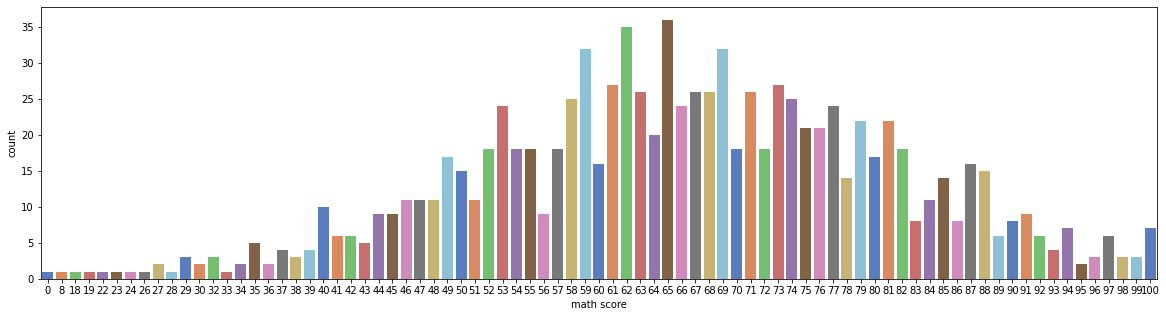

In [ ]:
plt.figure(figsize=(20,5))
p=sns.countplot(x="math score",data=d,palette="muted")
plt.show()

How many students passed in Math exam ?

Pass : 960
Fail : 40


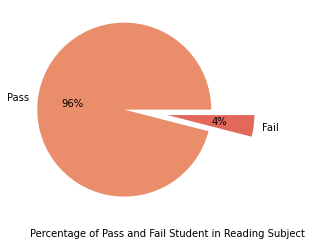

In [ ]:
passmark=40
x=d['Math_PassStatus']=np.where(d['math score']<passmark,'F','P')
d.Math_PassStatus.value_counts()
pas=0
fail=0

for i in x:
  if(i)=='P':
    pas=pas+1
  else:
    fail=fail+1
print("Pass :",pas)
print("Fail :",fail)
x=np.array([pas,fail])

label=["Pass","Fail"]
colors = sns.color_palette('flare')
plt.xlabel("Percentage of Pass and Fail Student in Reading Subject")
myexplode=(0.5,0)
plt.pie(x,labels=label,colors=colors,autopct="%1.0f%%",explode=myexplode)
plt.show()

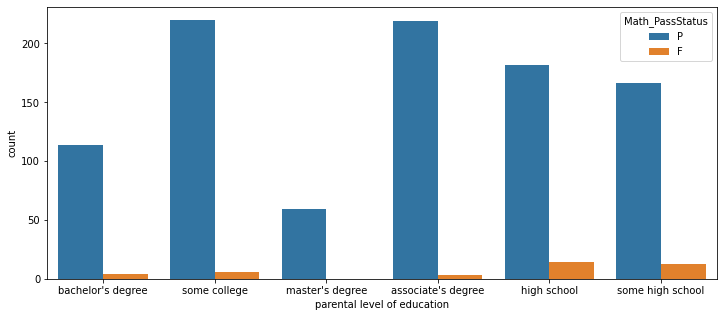

In [ ]:
plt.figure(figsize=(12,5))

p=sns.countplot(x='parental level of education',data=d,hue='Math_PassStatus')



Let Explore Reading Data

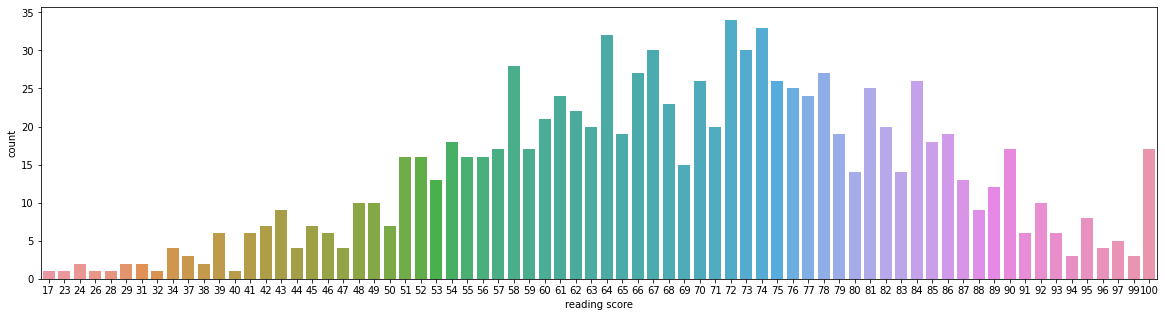

In [ ]:
plt.figure(figsize=(20,5))
p=sns.countplot(x="reading score",data=d)
plt.show()

Percantage of student passed Reading exam

Pass : 974
Fail : 26


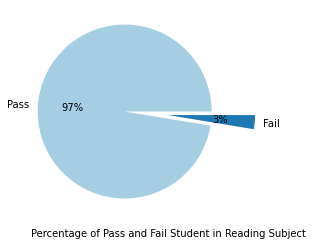

In [ ]:
x=d['Reading_PassStatus']=np.where(d['reading score']<passmark,'F','P')
d.Math_PassStatus.value_counts()
pas=0
fail=0

for i in x:
  if(i)=='P':
    pas=pas+1
  else:
    fail=fail+1
print("Pass :",pas)
print("Fail :",fail)
x=np.array([pas,fail])

label=["Pass","Fail"]
colors = sns.color_palette('Paired')
plt.xlabel("Percentage of Pass and Fail Student in Reading Subject")
myexplode=(0.5,0)
plt.pie(x,labels=label,colors=colors,autopct="%1.0f%%",explode=myexplode)
plt.show()

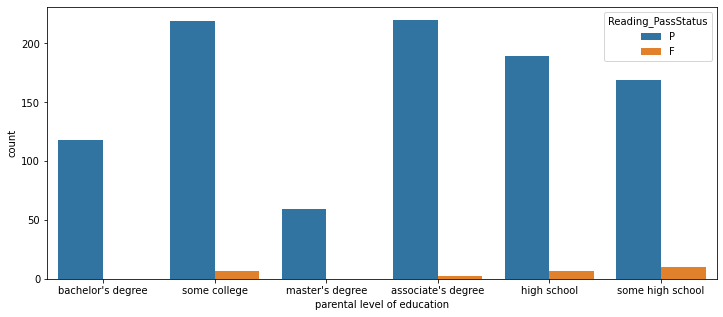

In [ ]:
plt.figure(figsize=(12,5))
p=sns.countplot(x='parental level of education',data=d,hue='Reading_PassStatus')


Let us explore Writing Score

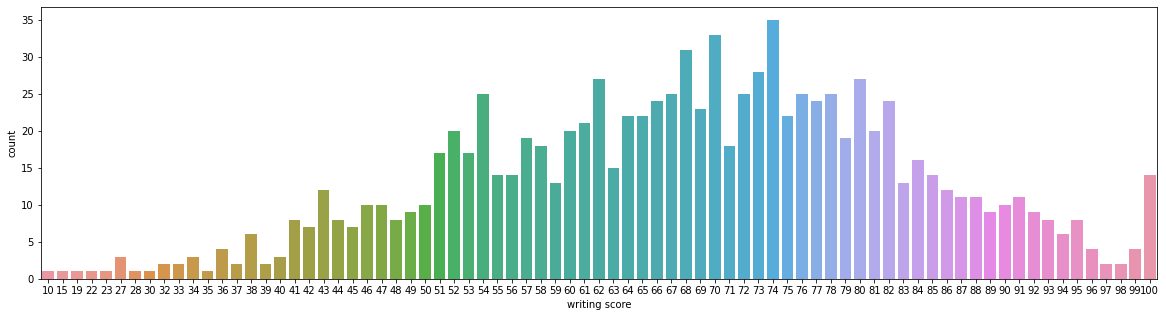

In [ ]:
plt.figure(figsize=(20,5))
p=sns.countplot(x="writing score",data=d)
plt.show()

percantage of student passed writing exam


Pass : 968
Fail : 32


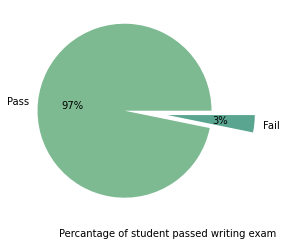

In [ ]:
x=d['Writing_PassStatus']=np.where(d['writing score']<passmark,'F','P')
d.Math_PassStatus.value_counts()
pas=0
fail=0
#print(x)
for i in x:
  if(i)=='P':
    pas=pas+1
  else:
    fail=fail+1
print("Pass :",pas)
print("Fail :",fail)
x=np.array([pas,fail])

label=["Pass","Fail"]
plt.xlabel("Percantage of student passed writing exam")
colors = sns.color_palette('crest')
myexplode=(0.5,0)
plt.pie(x,labels=label,autopct=("%1.0f%%"),explode=myexplode,colors=colors)
plt.show()

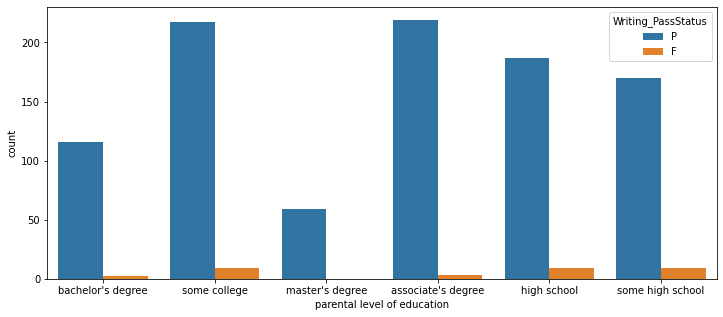

In [ ]:
plt.figure(figsize=(12,5))

p=sns.countplot(x='parental level of education',data=d,hue='Writing_PassStatus')


Let us check "How many Students passed in all the subjects ?"

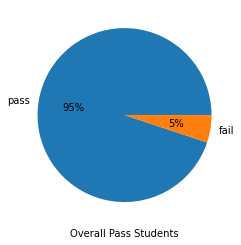

In [ ]:
d["OverAll_PassStatus"]=d.apply(lambda x:'F' if x["Math_PassStatus"]=="F" or x["Reading_PassStatus"]=="F" or x["Writing_PassStatus"]=="F" else "P", axis=1)
x=d.OverAll_PassStatus.value_counts()
plt.xlabel("Overall Pass Students")
plt.pie(x,labels=["pass","fail"],autopct=("%1.0f%%"))
plt.show()

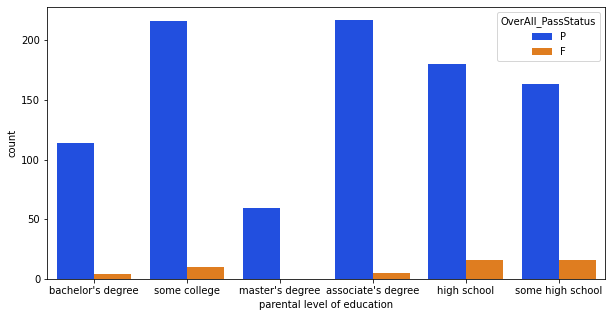

In [ ]:
plt.figure(figsize=(10,5))
p = sns.countplot(x='parental level of education', data = d, hue='OverAll_PassStatus', palette='bright')



Finding the Percentage of Marks

In [ ]:
d['Total_Marks']=d['math score']+d['reading score']+d['writing score']
d['Percentage']=d['Total_Marks']/3
d['Percentage']=d['Percentage'].astype(int)

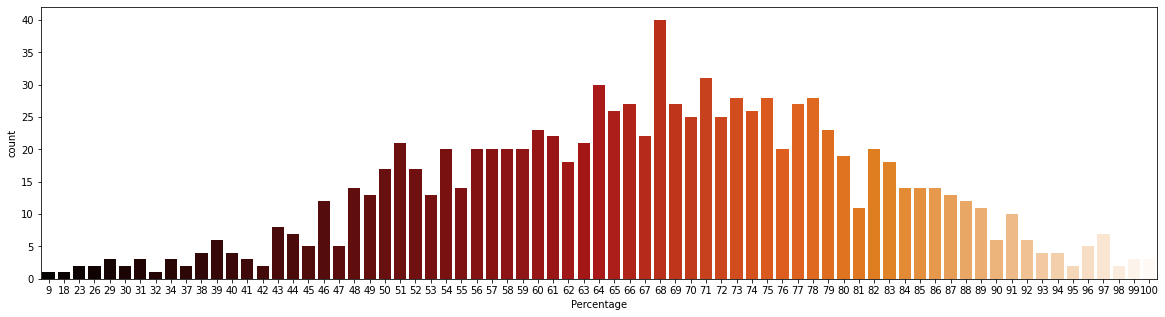

In [ ]:
plt.figure(figsize=(20,5))
p=sns.countplot(x="Percentage",data=d,palette="gist_heat")
_=plt.setp(p.get_xticklabels(),rotation=0)

Let us Assign the grades
 Grading
above 80 = A Grade
70 to 80 = B Grade
60 to 70 = C Grade
50 to 60 = D Grade
40 to 50 = E Grade
below 40 = F Grade (means Fail)

In [ ]:
def GetGrade(Percentage, OverAll_PassStatus):
  if(OverAll_PassStatus=='F'):
    return 'F'
  if(Percentage>=80):
    return 'A'
  if(Percentage>=70):
    return 'B'
  if(Percentage>=60):
    return 'C'
  if(Percentage>=50):
    return 'D'
  if(Percentage>=40):
    return 'E'
  else:
    return 'F'
d['Grade'] = d.apply(lambda x: GetGrade(x['Percentage'],x['OverAll_PassStatus']), axis=1)
d.Grade.value_counts()


B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

We will Plot the grades obtained in a order

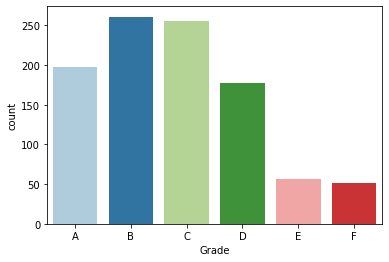

In [ ]:
sns.countplot(x="Grade", data=d, order=['A','B','C','D','E','F'],palette="Paired")
plt.show()

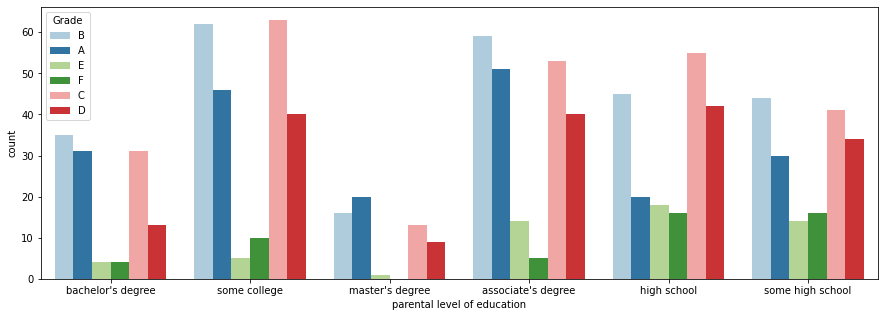

In [ ]:
plt.figure(figsize=(15,5))
p=sns.countplot(x='parental level of education',data=d,hue='Grade',palette='Paired')
